### Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


In [19]:
%pip install seaborn
%pip install folium
%pip install requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [20]:
import pandas as pd
import requests
import io

# URL of the CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Send a GET request to the URL
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    # Read the content of the response into a DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    print('Data downloaded and read into a dataframe!')
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


Data downloaded and read into a dataframe!


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [22]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [23]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [24]:
df.head(40)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


### TASK 1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


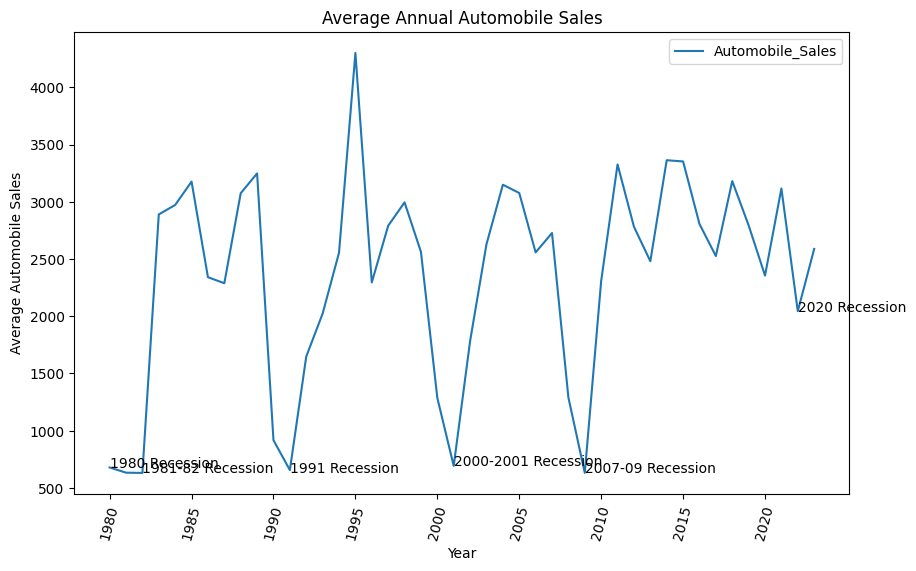

In [27]:
plt.figure(figsize=(10,6))
df_new = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_new.plot(kind='line')
plt.xticks(list(range(1980,2024,5)), rotation = 75)
plt.text(1980,677,'1980 Recession')
plt.text(1982, 633, '1981-82 Recession')
plt.text(1991, 633, '1991 Recession')
plt.text(2001, 692, '2000-2001 Recession')
plt.text(2009, 631, '2007-09 Recession')
plt.text(2022, 2044, '2020 Recession')

plt.xlabel("Year")
plt.ylabel("Average Automobile Sales")
plt.title("Average Annual Automobile Sales")

plt.legend()
plt.show()

### TASK 2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


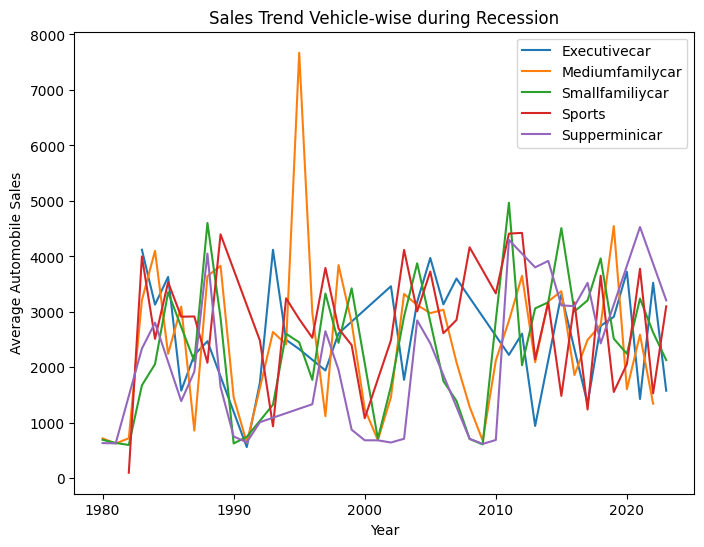

In [28]:
plt.figure(figsize=(8,6))
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.legend()
plt.title('Sales Trend Vehicle-wise during Recession')

plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.show()

From this plot, we can understand the during the recession period, the sales for 'Mediumfamilycar' increased after the recession of 1991 while sales other types of Vehicle found to be decreased.  

### TASK 3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

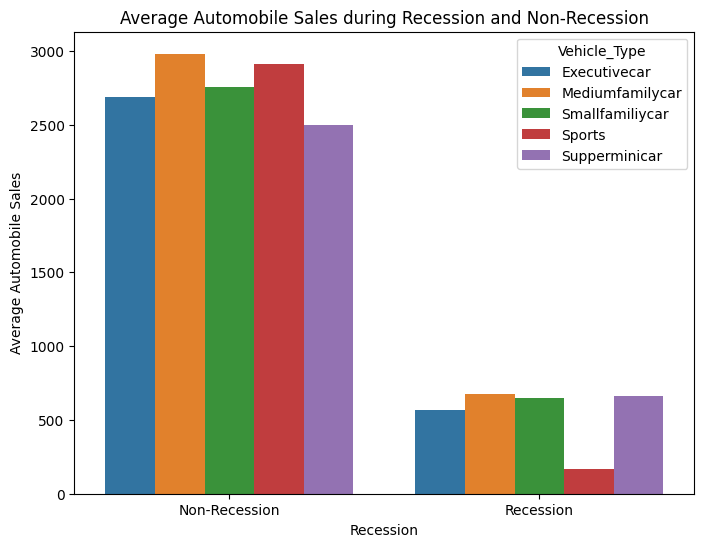

In [29]:
Recession_data =df[df['Recession']==1]
new_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

#sales_by_vehicle_Type = Recession_data.groupby('Vehicle_type')['Automobile_Sales'].sum().reset_index()

#Create a bar chat using seaborn 
plt.figure(figsize=(8,6))
sns.barplot(x='Recession',y='Automobile_Sales',hue='Vehicle_Type', data=new_df)
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()



From this plot, we conclude that during recessions sales of all types of vehicles decease drastically and specifically the sales of "Sports vehicles" are found to be in worse condition. 

### TASK 4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 


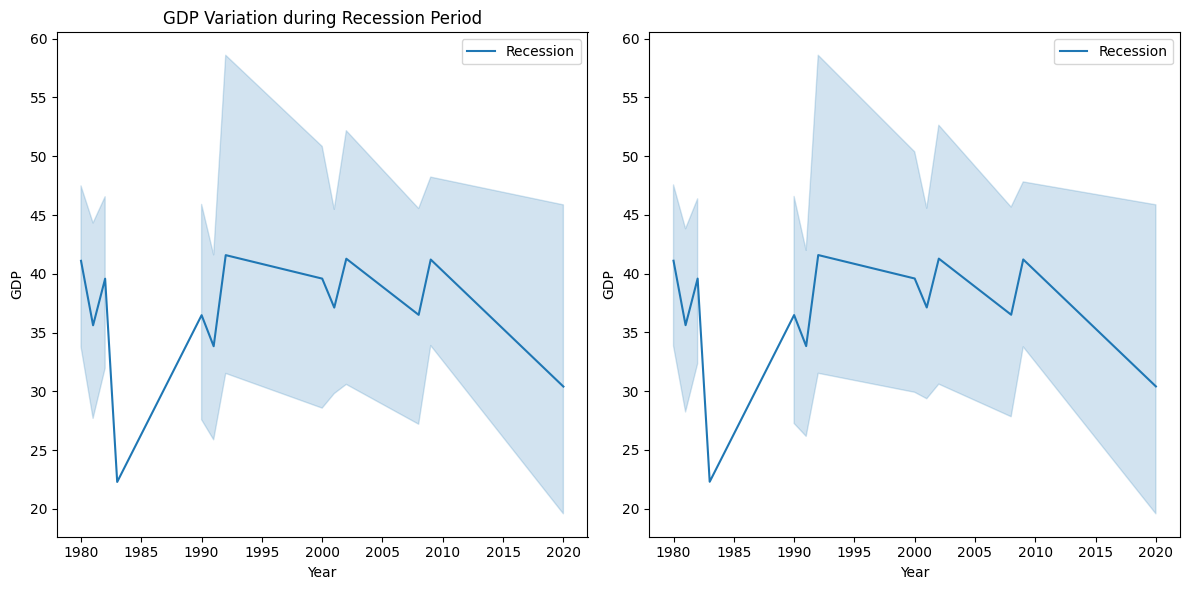

In [30]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession']==1]
non_rec_data = df[df['Recession']==0]

#figure
fig=plt.figure(figsize=(12,6))

#Create different axes for subploting
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#plt.subplot(1,2,1)
sns.lineplot(x='Year',y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1,2,2)
sns.lineplot(x='Year',y='GDP', data=rec_data, label='Recession', ax=ax1)
ax0.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

plt.tight_layout()
plt.show()

    
    
             

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

### TASK 5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>


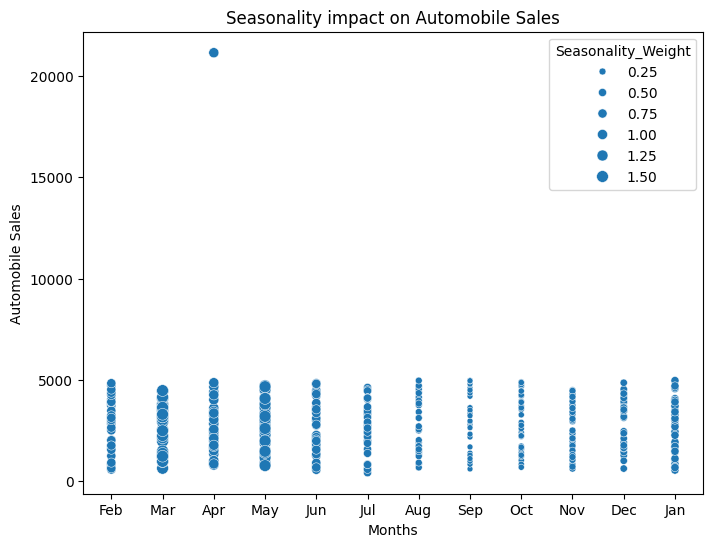

In [31]:
non_rec_data = df[df['Recession']==0]
Size= non_rec_data['Seasonality_Weight']
fig= plt.figure(figsize=(8,6))

sns.scatterplot(data=non_rec_data,x='Month', y='Automobile_Sales',size=Size)
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Months')
plt.ylabel('Automobile Sales')
plt.show()

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

### TASK 6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 

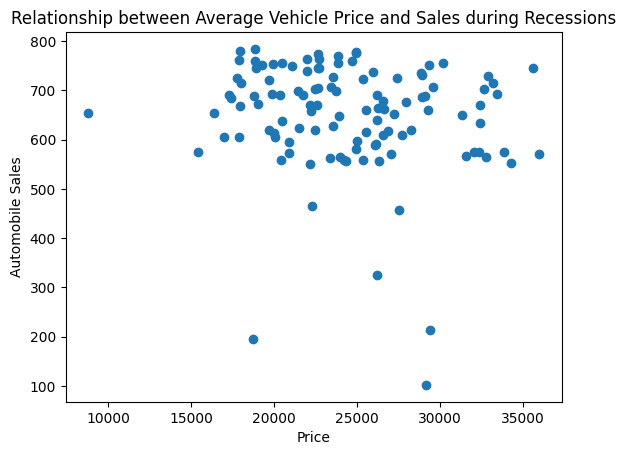

In [32]:
rec_data = df[df['Recession'] == 1]
plt.scatter(x=rec_data['Price'], y=rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile Sales')

plt.title('Relationship between Average Vehicle Price and Sales during Recessions')  
plt.show()

 ### TASK 7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


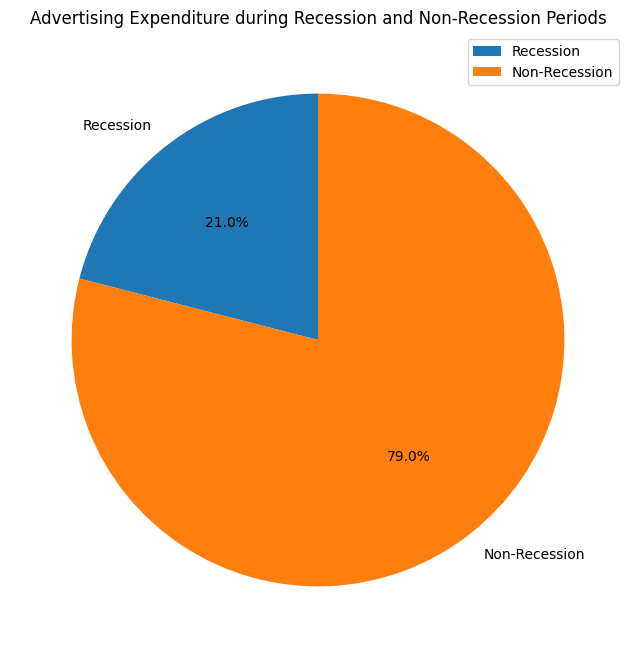

In [33]:
Rec_data=df[df['Recession']==1]
Non_Rec_data=df[df['Recession']==0]

Rec_Adv=Rec_data['Advertising_Expenditure'].sum()
Non_Rec_Adv=Non_Rec_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(10,8))
sizes=[Rec_Adv,Non_Rec_Adv]
labels=['Recession','Non-Recession']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.legend()
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()
                               

from the above plot, we can interpret that advertisement expenditure during the recession was 80% of total spending where non-recession period had only 20% of total spending.

### TASK 8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


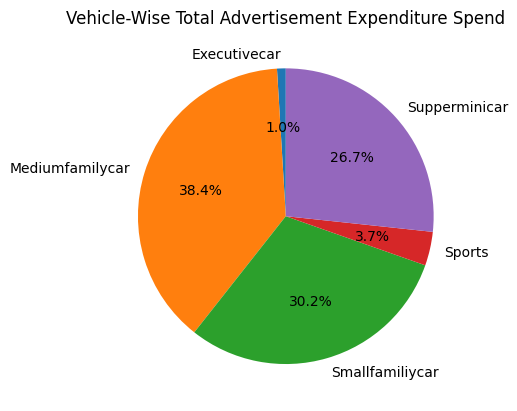

In [34]:
rec_data=df[df['Recession']==1]
df_new = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
labels=['Vehicle_Type']
sizes=df_new.values
labels=df_new.index
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title("Vehicle-Wise Total Advertisement Expenditure Spend")

plt.show()

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

### TASK 9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


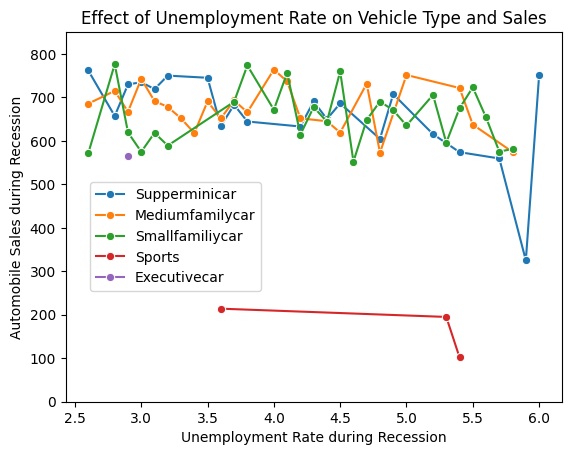

In [35]:
Rec_data =df[df['Recession']==1]

sns.lineplot(data=Rec_data,x='unemployment_rate',y='Automobile_Sales',hue='Vehicle_Type',marker='o',err_style=None)
plt.ylim(0,850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate during Recession')
plt.ylabel('Automobile Sales during Recession')
plt.legend(loc=(0.05,.3))
plt.show()


From this plot, we can conclude that when unemployment reaches 6 the sales of supermini car drop drastically and increase suddenly after 6 unemployment rate.

### TASK 10 Create a map on the hightest sales region/offices of the company during recession period


In [42]:
import requests
import json

def download_and_read_json(url):
    # Send a GET request to the URL
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON content
        data = response.json()
        return data
    else:
        print(f"Failed to download the file. Status code: {response.status}")
        return None

# URL of the JSON file
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

# Download and read the JSON data
data = download_and_read_json(url)

# Check if data is not None and print success message and data
if data:
    print("Data downloaded and read into a JSON object!")
    print(data)


Data downloaded and read into a JSON object!
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87

In [48]:
import folium
import pandas as pd

# Filter data for recession period
Rec_data = df[df['Recession'] == 1]

# Group by city and sum automobile sales
Sales_by_city = Rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a Folium map centered in the USA
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Path to the GeoJSON file (ensure the correct path is provided)
geojson_path = data

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=geojson_path,
    data=Sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the map
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1
